<a href="https://colab.research.google.com/github/Mayank8451/Machine-Learning-Notebooks/blob/master/Advanced_Data_Wrangling_Concepts_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎉 Woohoo! It's time for another assignment!

Are you ready to put your advanced data wrangling skills to the test? 💪📊🐍

Get ready to dive deep into Python's data wrangling tools and techniques. You'll be a pro at handling messy and complex data sets in no time! 🤓👨‍💻🔍

So buckle up and let's get started! Good luck! 🍀🚀

#### All the datasets or csv files required for this assignment can be found here: https://drive.google.com/drive/folders/10TVACe8PwRD24apY5zje6osH387A98GU?usp=sharing

#### You can download the data and start working with the assignment.

## **Activity 1:**



### **FIFA 2018**

Suppose you are a data analyst working for a soccer team and you have been given a dataset that contains information about the team's performance during the 2018 FIFA World Cup. The dataset includes information about the team's matches, goals scored, ball possession percentage, attempts on goal, and other performance metrics.

Using the provided dataset, perform the following data wrangling tasks:

1. Aggregate the data by team and calculate the following metrics:
    * Total goals scored
    * Average ball possession percentage
    * Total attempts on goal
    * Total on-target attempts
    * Total off-target attempts
    * Total blocked attempts
    * Total corners

2. Identify the top-performing teams based on the above metrics.

3. Aggregate the data by match date and calculate the following metrics:

    * Total goals scored across all matches
    * Average ball possession percentage across all matches
    * Total attempts on goal across all matches
    * Total on-target attempts across all matches
    * Total off-target attempts across all matches
    * Total blocked attempts across all matches
    * Total corners across all matches

4. Identify any patterns or trends in the data that may be useful for predicting future performance.

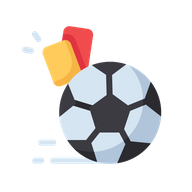

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/FIFA 2018 Statistics.csv')

df.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

In [21]:
# team_aggregate = df.groupby('Team').agg({
#     'Goal Scored': 'sum',
#     'Ball Possession %': 'mean',
#     'Attempts': 'sum',
#     'On-Target': 'sum',
#     'Off-Target': 'sum',
#     'Blocked': 'sum',
#     'Corners': 'sum'
# }).reset_index()

aggregation_functions = {
    'Goal Scored': 'sum',
    'Ball Possession %': 'mean',
    'Attempts': 'sum',
    'On-Target': 'sum',
    'Off-Target': 'sum',
    'Blocked': 'sum',
    'Corners': 'sum'
}
team_metrics = df.groupby('Team').agg(aggregation_functions).reset_index()
team_metrics['Ball Possession %'] = team_metrics['Ball Possession %'].round(2)

print(team_metrics)


              Team  Goal Scored  Ball Possession %  Attempts  On-Target  \
0        Argentina            6              63.75        53         18   
1        Australia            2              51.00        32          8   
2          Belgium           16              52.43       106         40   
3           Brazil            8              55.60       103         38   
4         Colombia            6              50.25        39         12   
5       Costa Rica            2              41.33        28          9   
6          Croatia           14              55.14       115         29   
7          Denmark            3              45.25        40         12   
8            Egypt            2              45.00        29          5   
9          England           12              53.71        96         25   
10          France           14              47.86        82         30   
11         Germany            2              67.00        67         20   
12         Iceland       

In [23]:
metrics = ['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners']

rankings = {}
for metric in metrics:
    sorted_df = team_metrics.sort_values(metric, ascending=False)
    top_team = sorted_df.index[0]
    rankings[metric] = top_team

print("Top-performing teams based on the metrics:")
print(rankings)

Top-performing teams based on the metrics:
{'Goal Scored': 2, 'Ball Possession %': 27, 'Attempts': 6, 'On-Target': 2, 'Off-Target': 6, 'Blocked': 3, 'Corners': 3}


In [41]:

sorted_metrics = team_metrics.sort_values(by=metrics, ascending=False)

top_performing_teams = sorted_metrics.head(5)

print(top_performing_teams[['Team', 'Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
                            'Off-Target', 'Blocked', 'Corners']])


       Team  Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  \
2   Belgium           16              52.43       106         40          40   
6   Croatia           14              55.14       115         29          58   
10   France           14              47.86        82         30          36   
9   England           12              53.71        96         25          43   
23   Russia           11              38.80        46         19          16   

    Blocked  Corners  
2        26       39  
6        28       40  
10       16       21  
9        28       39  
23       11       26  


In [29]:
aggregation_functions = {
    'Goal Scored': 'sum',
    'Ball Possession %': 'mean',
    'Attempts': 'sum',
    'On-Target': 'sum',
    'Off-Target': 'sum',
    'Blocked': 'sum',
    'Corners': 'sum'
}

match_date_metrics = df.groupby('Date').agg(aggregation_functions)

print(match_date_metrics)

            Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  \
Date                                                                          
01-07-2018            4              50.00        68         20          27   
02-07-2018            7              50.00        69         23          25   
03-07-2018            3              49.75        60         13          27   
06-07-2018            5              50.00        56         18          23   
07-07-2018            6              50.00        49         15          21   
10-07-2018            1              50.00        28          8          13   
11-07-2018            3              50.00        33          8          17   
14-06-2018            5              50.00        19          7           6   
14-07-2018            2              50.00        27          9          10   
15-06-2018            8              50.00        63         20          27   
15-07-2018            6              50.00        23

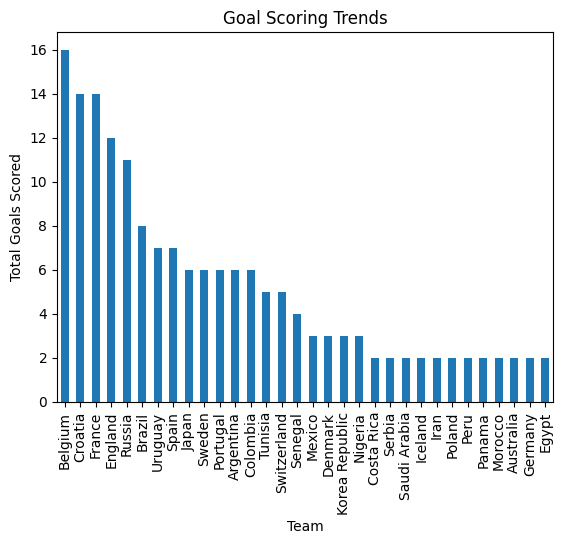

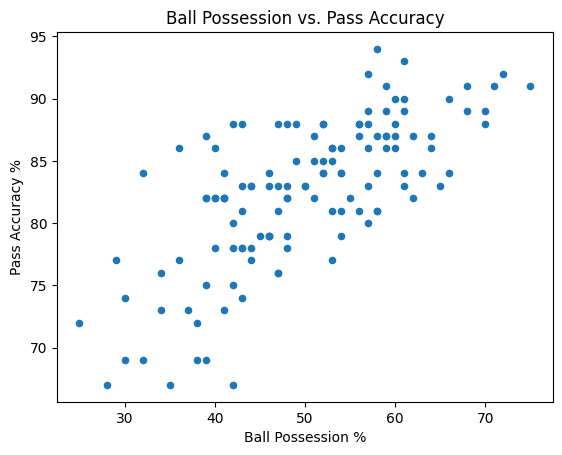

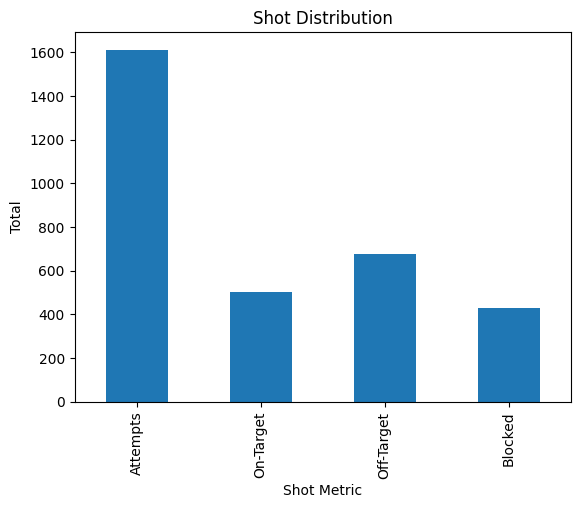

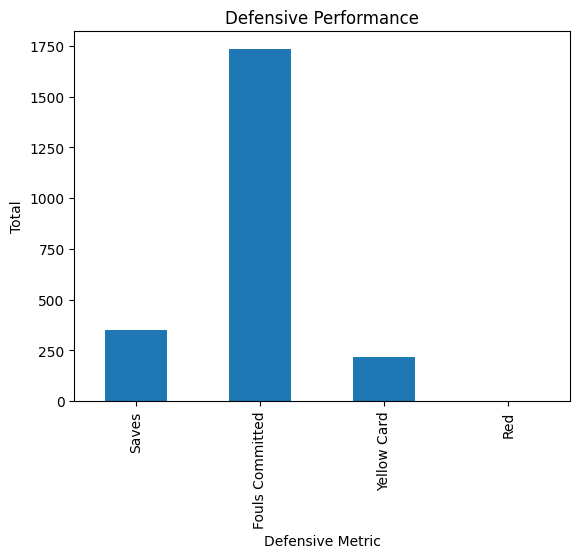

In [38]:

import matplotlib.pyplot as plt

goal_scoring = df.groupby('Team')['Goal Scored'].sum().sort_values(ascending=False)
goal_scoring.plot(kind='bar', xlabel='Team', ylabel='Total Goals Scored')
plt.title('Goal Scoring Trends')
plt.show()


possession_passing = df[['Ball Possession %', 'Pass Accuracy %']]
possession_passing.plot(x='Ball Possession %', y='Pass Accuracy %', kind='scatter')
plt.title('Ball Possession vs. Pass Accuracy')
plt.show()


shot_metrics = df[['Attempts', 'On-Target', 'Off-Target', 'Blocked']]
shot_metrics.sum().plot(kind='bar', xlabel='Shot Metric', ylabel='Total')
plt.title('Shot Distribution')
plt.show()


defensive_metrics = df[['Saves', 'Fouls Committed', 'Yellow Card', 'Red']]
defensive_metrics.sum().plot(kind='bar', xlabel='Defensive Metric', ylabel='Total')
plt.title('Defensive Performance')
plt.show()


## **Activity 2:**



### Heart Disease UCI 💔:

In this assignment, we will explore some data wrangling techniques using the Heart Disease UCI dataset from UCI Machine Learning Repository. The dataset contains 303 observations and 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol level, fasting blood sugar, electrocardiographic results, maximum heart rate achieved, exercise-induced angina, ST depression induced by exercise relative to rest, slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy, thalassemia, and whether or not a patient has heart disease.

1. 📊 Load the dataset into a Pandas dataframe and display the first five rows of the dataset.
2. 📈 Use the `apply()` function to create a new feature called `age_category` that categorizes patients into three age groups: 30-49, 50-64, and 65 or older based on their age.
3. 📐 Use the `lambda()` function to create a new feature called `max_heart_rate_category` that categorizes patients into two groups: those with a maximum heart rate achieved greater than or equal to 150 and those with a maximum heart rate achieved less than 150.
4. 📊 Use aggregation operations to calculate the mean, median, minimum, and maximum resting blood pressure for each gender.
5. 📐 Use the `apply()` function to create a new feature called `cholesterol_category` that categorizes patients into three cholesterol groups: normal (<= 200 mg/dL), borderline high (200-239 mg/dL), and high (>= 240 mg/dL).
6. 📈 Use the `groupby()` function to calculate the mean, median, and standard deviation of serum cholesterol level for each age category.
7. 📊 Use aggregation operations to calculate the mean, median, minimum, and maximum serum cholesterol level for each gender and chest pain type.
8. 📐 Use the `apply()` function to create a new feature called `st_depression_category` that categorizes patients into three groups: no ST depression, slight ST depression (<= 1 mm), and significant ST depression (> 1 mm).
9. 📈 Use the `groupby()` function to calculate the mean, median, and standard deviation of ST depression induced by exercise relative to rest for each age category and gender.


Dataset link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

If you face issues to download the data use the following url and names directly in the code:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [57]:
# Code
import numpy as np
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [60]:
df['age_category'] = df['age'].apply(lambda age: '30-49' if 30 <= age <= 49 else ('50-64' if 50 <= age <= 64 else '65 and older'))
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholesterol_category,age_category
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,high,65 and older
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,borderline high,65 and older
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,high,30-49
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,borderline high,30-49
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,borderline high,50-64


In [61]:
# Use the `lambda()` function to create a new feature called `max_heart_rate_category` that categorizes patients into two groups:
# those with a maximum heart rate achieved greater than or equal to 150 and those with a maximum heart rate achieved less than 150.
df['max_heart_rate_category'] = df['thalach'].apply(lambda x: 'greater than 150' if x >= 150 else 'less than 150')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholesterol_category,age_category,max_heart_rate_category
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,high,65 and older,less than 150
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,borderline high,65 and older,less than 150
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,high,30-49,greater than 150
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,borderline high,30-49,greater than 150
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,borderline high,50-64,greater than 150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,high,30-49,less than 150
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,normal,65 and older,less than 150
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,normal,50-64,less than 150
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,borderline high,50-64,greater than 150


In [62]:
data_agg_gender = df.groupby('sex')['trestbps'].agg(['mean', 'median', 'max', 'min'])
data_agg_gender

,mean,median,max,min
sex,,,,
0.0,133.340206,132.0,200.0,94.0
1.0,130.843902,130.0,192.0,94.0


In [63]:
# Use the `apply()` function to create a new feature called `cholesterol_category` that categorizes patients into three cholesterol groups:
#  normal (<= 200 mg/dL), borderline high (200-239 mg/dL), and high (>= 240 mg/dL)
df['cholesterol_category'] = df['chol'].apply(lambda x: 'normal' if x <= 200 else ('borderline high' if 200 < x <= 239 else 'high'))
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cholesterol_category,age_category,max_heart_rate_category
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,high,65 and older,less than 150
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,borderline high,65 and older,less than 150
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,high,30-49,greater than 150
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,borderline high,30-49,greater than 150
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,borderline high,50-64,greater than 150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,high,30-49,less than 150
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,normal,65 and older,less than 150
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,normal,50-64,less than 150
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,borderline high,50-64,greater than 150


In [67]:
# 6. 📈 Use the `groupby()` function to calculate the mean, median, and standard deviation of serum cholesterol level for each age category.
data_agg_age_category = df.groupby('age_category')['chol'].agg(['mean', 'median', 'std']).round(2)
data_agg_age_category

,mean,median,std
age_category,,,
30-49,233.23,232.0,43.79
50-64,250.24,244.0,49.66
65 and older,259.88,251.0,68.91


In [ ]:
#Use aggregation operations to calculate the mean, median, minimum, and maximum serum cholesterol level for each gender and chest pain type
agg_gender_and_chest_pain = df.groupby(['sex', 'cp'])['chol'].agg(['mean', 'median', 'min', 'max']).round(2)
agg_gender_and_chest_pain

In [ ]:
#Use the `apply()` function to create a new feature called `st_depression_category` that categorizes patients into three groups:
# no ST depression, slight ST depression (<= 1 mm), and significant ST depression (> 1 mm)
df['st_depression_category'] = df['oldpeak'].apply(lambda x: 'no ST depression' if x == 0 else ('slight ST depression' if x <= 1 else 'Significant ST Depression'))
df

In [72]:
#Use the `groupby()` function to calculate the mean, median, and standard deviation of ST depression induced by exercise relative to rest for
#each age category and gender.
data_age_category_and_gender = df.groupby(['age_category', 'sex'])['oldpeak'].agg(['mean', 'median', 'std']).round(2)
data_age_category_and_gender

mean  median   std
age_category sex                    
30-49        0.0  0.44     0.1  0.72
             1.0  0.74     0.0  1.05
50-64        0.0  1.04     0.6  1.30
             1.0  1.29     1.2  1.22
65 and older 0.0  0.91     0.8  0.74
             1.0  1.24     1.0  1.10

## **Activity 3:**

### **Honey Production in the USA (1998-2012)**

Suppose you have been provided with a dataset of Honey Production in the USA from the years 1998-2012. The dataset contains information about the state, number of colonies, yield per colony, total production, stocks, price per pound, production value, and year. You want to analyze this data to gain insights into the honey production in the USA.

Using the provided dataset, perform the following tasks:

1. Split the dataset into two separate datasets, one for odd years and one for even years.
2. Group the data by state and calculate the total production for each state for each year.
3. Calculate the average yield per colony for each state over the entire dataset.
4. Left join the odd year dataset with the even year dataset to create a new dataset containing the total production for each state for both odd and even years.
5. Right join the odd year dataset with the even year dataset to create a new dataset containing the total production for each state for both odd and even years.

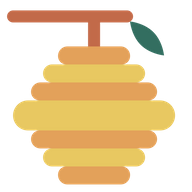

In [84]:
# Write your code here
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/honeyproduction.csv')
df.head(3)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998


In [85]:
#1. Split the dataset into two separate datasets, one for odd years and one for even years.
odd_years_data = df[df['year'] % 2 != 0]
even_years_data = df[df['year'] % 2 == 0]
even_years_data

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [86]:
# 2. Group the data by state and calculate the total production for each state for each year.
group_state = df.groupby(['state', 'year'])['totalprod'].sum()
group_state

state  year
AL     1998    1136000.0
       1999    1156000.0
       2000    1248000.0
       2001    1022000.0
       2002    1032000.0
                 ...    
WY     2008    2379000.0
       2009    1776000.0
       2010    1224000.0
       2011    1890000.0
       2012    2550000.0
Name: totalprod, Length: 626, dtype: float64

In [87]:
# 3.Calculate the average yield per colony for each state over the entire dataset.
average_yield_per_colony = df.groupby(['state'])['yieldpercol'].mean()
average_yield_per_colony

state
AL    67.533333
AR    73.933333
AZ    60.066667
CA    55.800000
CO    62.800000
FL    83.066667
GA    54.666667
HI    98.000000
IA    65.733333
ID    44.000000
IL    61.666667
IN    60.933333
KS    56.066667
KY    52.133333
LA    95.733333
MD    45.000000
ME    31.066667
MI    68.133333
MN    74.266667
MO    53.400000
MS    87.466667
MT    77.333333
NC    47.800000
ND    88.066667
NE    67.466667
NJ    36.933333
NM    53.866667
NV    45.181818
NY    69.133333
OH    63.533333
OK    46.333333
OR    44.400000
PA    50.400000
SC    68.000000
SD    75.800000
TN    56.333333
TX    70.533333
UT    46.533333
VA    40.200000
VT    66.933333
WA    48.800000
WI    79.400000
WV    48.533333
WY    66.133333
Name: yieldpercol, dtype: float64

In [96]:
#Left join the odd year dataset with the even year dataset to create a new dataset containing the total production for each state for both odd and even years.

merged_IJ_df = pd.merge(odd_years_data, even_years_data, how='left',left_on='totalprod',right_on='totalprod')
merged_IJ_df

,state_x,numcol_x,yieldpercol_x,totalprod,stocks_x,priceperlb_x,prodvalue_x,year_x,state_y,numcol_y,yieldpercol_y,stocks_y,priceperlb_y,prodvalue_y,year_y
0,AL,17000.0,68,1156000.0,185000.0,0.56,647000.0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZ,52000.0,62,3224000.0,1548000.0,0.62,1999000.0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR,52000.0,89,4628000.0,2592000.0,0.53,2453000.0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,465000.0,60,27900000.0,9486000.0,0.55,15345000.0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CO,27000.0,76,2052000.0,1436000.0,0.68,1395000.0,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,VA,4000.0,40,160000.0,21000.0,4.07,651000.0,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,WA,71000.0,38,2698000.0,836000.0,1.93,5207000.0,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,WV,4000.0,53,212000.0,45000.0,2.57,545000.0,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,WI,57000.0,63,3591000.0,1508000.0,1.89,6787000.0,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
merged_data = odd_years_data.merge(even_years_data, on='state', how='left', suffixes=('_odd', '_even'))
print(merged_data)

     state  numcol_odd  yieldpercol_odd  totalprod_odd  stocks_odd  \
0       AL     17000.0               68      1156000.0    185000.0   
1       AL     17000.0               68      1156000.0    185000.0   
2       AL     17000.0               68      1156000.0    185000.0   
3       AL     17000.0               68      1156000.0    185000.0   
4       AL     17000.0               68      1156000.0    185000.0   
...    ...         ...              ...            ...         ...   
2285    WY     35000.0               54      1890000.0    265000.0   
2286    WY     35000.0               54      1890000.0    265000.0   
2287    WY     35000.0               54      1890000.0    265000.0   
2288    WY     35000.0               54      1890000.0    265000.0   
2289    WY     35000.0               54      1890000.0    265000.0   

      priceperlb_odd  prodvalue_odd  year_odd  numcol_even  yieldpercol_even  \
0               0.56       647000.0      1999      16000.0                71   

In [97]:
#5.Right join the odd year dataset with the even year dataset to create a new dataset containing the total production for each state for both odd and even years.
merged_right_df = pd.merge(odd_years_data, even_years_data, how='right',left_on='totalprod',right_on='totalprod')
merged_right_df

,state_x,numcol_x,yieldpercol_x,totalprod,stocks_x,priceperlb_x,prodvalue_x,year_x,state_y,numcol_y,yieldpercol_y,stocks_y,priceperlb_y,prodvalue_y,year_y
0,NaN,NaN,NaN,1136000.0,NaN,NaN,NaN,NaN,AL,16000.0,71,159000.0,0.72,818000.0,1998
1,NaN,NaN,NaN,3300000.0,NaN,NaN,NaN,NaN,AZ,55000.0,60,1485000.0,0.64,2112000.0,1998
2,NaN,NaN,NaN,3445000.0,NaN,NaN,NaN,NaN,AR,53000.0,65,1688000.0,0.59,2033000.0,1998
3,NaN,NaN,NaN,37350000.0,NaN,NaN,NaN,NaN,CA,450000.0,83,12326000.0,0.62,23157000.0,1998
4,NaN,NaN,NaN,1944000.0,NaN,NaN,NaN,NaN,CO,27000.0,72,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,NaN,NaN,NaN,2542000.0,NaN,NaN,NaN,NaN,WA,62000.0,41,1017000.0,2.38,6050000.0,2012
349,WV,6000.0,48.0,288000.0,95000.0,2.09,602000.0,2007.0,WV,6000.0,48,95000.0,2.91,838000.0,2012
350,IN,9000.0,32.0,288000.0,101000.0,2.02,582000.0,2009.0,WV,6000.0,48,95000.0,2.91,838000.0,2012
351,NaN,NaN,NaN,4140000.0,NaN,NaN,NaN,NaN,WI,60000.0,69,1863000.0,2.05,8487000.0,2012


In [99]:
merged_data_right = even_years_data.merge(odd_years_data, on='state', how='right', suffixes=('_odd', '_even'))
print(merged_data_right)

     state  numcol_odd  yieldpercol_odd  totalprod_odd  stocks_odd  \
0       AL     16000.0               71      1136000.0    159000.0   
1       AL     16000.0               78      1248000.0    187000.0   
2       AL     12000.0               86      1032000.0    103000.0   
3       AL     12000.0               87      1044000.0    282000.0   
4       AL     11000.0               72       792000.0    230000.0   
...    ...         ...              ...            ...         ...   
2285    WY     39000.0               75      2925000.0    380000.0   
2286    WY     39000.0               85      3315000.0    497000.0   
2287    WY     39000.0               61      2379000.0    381000.0   
2288    WY     34000.0               36      1224000.0    282000.0   
2289    WY     50000.0               51      2550000.0    459000.0   

      priceperlb_odd  prodvalue_odd  year_odd  numcol_even  yieldpercol_even  \
0               0.72       818000.0      1998      17000.0                68   